# consistency checks for lpm annihilation simulation
Timothy Tyree<br>
3.29.2023

In [1]:
from lib.my_initialization import *

In [2]:
import subprocess

In [3]:
plt.plot([1]*4)
plt.close()
#reset matplotlib
import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
mpl.rcParams.update(matplotlib.rcParamsDefault) #reset matplotlib

# define module

# dev

In [4]:
# cfolder=f"{nb_dir}/../c/attractive"
# cfolder='/Users/timothytyree/Documents/GitHub/bgmc/c/attractive'
cfolder='/home/timothytyree/Documents/GitHub/bgmc/c/attractive'
os.chdir(cfolder)

In [5]:
!pwd

/home/timothytyree/Documents/GitHub/bgmc/c/attractive


In [6]:
#compile the executable
os.system('./gcc.sh')

0

In [7]:
# # input_string = f"0.155 0.4158 5 300 9.3154 1 0.0001 0.0001 4 10000 1 0 0 0 0 1 2"
# # input_string = f"0.155 0.4158 5 300 9.3154 1 0.0001 0.0001 4 2 1 0 0 0 0 1 2"
# func_path = f"{cfolder}/return_CollTime.x"
# f"{func_path} {input_string}"
# # os.system(f"{func_path} {input_string}")
# # os.system(f"{func_path} {input_string} | grep 'Tavg=' | grep -Eo '[+-]?[0-9]+([.][0-9]+)?'")
# os.system(f"{func_path} <<< {input_string} | grep 'Tavg=' | grep -Eo '[+-]?[0-9]+([.][0-9]+)?'")
# # os.system(f"/return_CollTime.x < 1-control.input | grep 'Tavg=' | grep -Eo '[+-]?[0-9]+([.][0-9]+)?'")

In [27]:
# N0_lst=list(range(2,100,4))
# N0_lst=list(range(2,100,8))
N0_lst=list(range(2,100,4))
# N0_lst

In [28]:
niter=1500
dt=1e-4
L=5 
# L=10 
# seed=1
seed=0
task_lst=[]
# for N0 in range(2,100,2):
for N0 in N0_lst:
    input_string = f"0.155 0.4158 {L} 300 9.3154 1 {dt} {dt} {N0} {niter} {seed} 0 0 0 0 1 2"
    call_string = f"/Users/timothytyree/Documents/GitHub/bgmc/c/attractive/return_CollTime.x <<< '{input_string}'"
    call_string+= " | grep 'Tavg=' | grep -Eo '[+-]?[0-9]+([.][0-9]+)?'"
    task_lst.append(call_string)
print(f"{len(task_lst)=}")

len(task_lst)=25


In [20]:
def routine(call_string):
    return eval(subprocess.check_output(call_string, shell=True))

In [21]:
retval=[]
for call_string in task_lst:
    retval.append(routine(call_string))
len(retval)

13

In [22]:
retval

[0.487786,
 0.0227659,
 0.00892117,
 0.00508737,
 0.00340195,
 0.00246907,
 0.0019022,
 0.00151398,
 0.00130778,
 0.00106154,
 0.00091899,
 0.000830848,
 0.00067526]

In [29]:
#run daskbag
printing=True
max_num_jobs=os.cpu_count()-1
npartitions=np.min((len(task_lst),max_num_jobs))
if printing:
    print(f"running {len(task_lst)} tasks over {npartitions} cpu cores...")
retval=eval_routine_daskbag(routine,task_lst,npartitions,printing=printing)
if printing:
    print(f"tasks complete!")

running 25 tasks over 7 cpu cores...
run time for evaluating routine was 99.35 seconds, yielding 25 values returned
tasks complete!


In [33]:
L

5

In [34]:
retval

[0.131555,
 0.0182424,
 0.00774567,
 0.00473174,
 0.00319498,
 0.00245092,
 0.001857,
 0.00148709,
 0.00122813,
 0.00108667,
 0.000960866,
 0.000786523,
 0.000687852,
 0.00061781,
 0.000552481,
 0.000504789,
 0.000464615,
 0.00042665,
 0.000381517,
 0.000357068,
 0.000329564,
 0.000315809,
 0.000283613,
 0.000285049,
 0.000265726]

In [35]:
A=L**2
q_lst=[]
w_lst=[]
for N0,Tavg in zip(N0_lst,retval):
    rate = 1/Tavg
    w = rate/A
    q = (N0+2)/A
#     q = N0/A
    #record
    w_lst.append(w)
    q_lst.append(q)

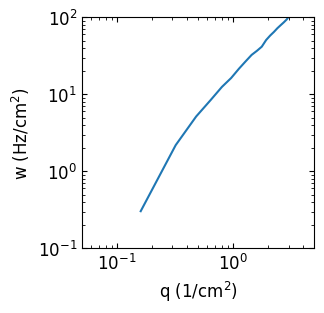

In [36]:
fig,ax=plt.subplots(figsize=(3,3))
fontsize=12
plt.plot(q_lst,w_lst)
plt.xscale('log')
plt.yscale('log')
plt.axis([5e-2,5e0,0.1,100])
plt.tick_params(top=True, right=True,direction='in',which='both')
format_plot(xlabel=r'q (1/cm$^2$)',ylabel=r'w (Hz/cm$^2$)',
            fontsize=fontsize)
plt.show()

In [26]:
beep(4)

-n 
-n 
-n 
-n 


0

In [101]:
# from multiprocessing import Pool

In [ ]:
#13 minutes with 1000 perturbations and cross-validation of training per call to routine
# npartitions = np.max((1,os.cpu_count()-1))
# npartitions = np.min((npartitions,len(task_lst)))
# print(f"evaluating tasks (estimated run time 80 minutes)...")
# print(f"evaluating {len(task_lst)} calls to gener_tbins_fast over {npartitions} cpu cores...")

In [100]:
# with Pool(processes=(os.cpu_count() - 1)) as pool:
#     retval = list(pool.map(routine, task_lst))

In [124]:
pd.read_csv ( '/Users/timothytyree/Documents/GitHub/bgmc/python/data/annihil_fitted_values.34.33.csv' )


,Unnamed: 0,index,N,L,CollTime,q,w,model_name
0,0,0,100,5,0.000526,4.00,76.045627,Fenton-Karma
1,1,1,99,5,0.000522,3.96,76.628352,Fenton-Karma
2,2,2,98,5,0.000546,3.92,73.260073,Fenton-Karma
3,3,3,97,5,0.000570,3.88,70.175439,Fenton-Karma
4,4,4,96,5,0.000563,3.84,71.047957,Fenton-Karma
...,...,...,...,...,...,...,...,...
379,379,91,9,10,0.041062,0.09,0.243534,Luo-Rudy
380,380,92,8,10,0.056884,0.08,0.175796,Luo-Rudy
381,381,93,7,10,0.077521,0.07,0.128997,Luo-Rudy
382,382,94,6,10,0.120295,0.06,0.083129,Luo-Rudy


In [125]:
10.147 - 2*0.4158

9.3154

In [ ]:
task_str=f"{r:.5f} {D:.5f} {L} {kappa:.5f} {varkappa:.5f} {x0} {Dt} {dt} {Nmax} {niter} {reflect} {set_second} {no_repulsion} {no_attraction} {neighbor} {force_code}"

In [ ]:
#TODO: replot Fig. 2B
#TODO: print its inputs
#TODO: use the function to generate its xy values
#TODO: overlay the xy values